<a href="https://colab.research.google.com/github/kilianodonell-cmd/Crop-_Statistics-/blob/main/notebooks/01_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Introduction

This study aims to replicate the crop area estimation methodology from Paris et al. (2025) using existing field and Earth Observation data for Gaza Province, Mozambique. The goal is to reproduce crop statistics and compare the results with the original study. We will also explore methods to address missing data, such as unvisited sampling areas, and consider expanding the analysis to other regions.

### Importing Libraries

This code imports essential libraries:
- **NumPy** (`np`) for numerical operations.
- **Pandas** (`pd`) for data manipulation and analysis.
- **GeoPandas** (`gpd`) for handling geospatial data.
- **Matplotlib** (`plt`) for creating plots and visualizations.

In [2]:


import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 01 – Data loading

Purpose:
- load data
- initial inspection
- basic cleaning



In [3]:


# --- load gdf
gdf_stra = gpd.read_file("../content/drive/MyDrive/Data_Mastery/data/shapefiles/moz_strata.shp")
gdf_sa = gpd.read_file("../content/drive/MyDrive/Data_Mastery/data/shapefiles/moz_sampling_areas.shp")
gdf_seg = gpd.read_file("../content/drive/MyDrive/Data_Mastery/data/shapefiles/moz_segments.shp")
gdf_districts = gpd.read_file("../content/drive/MyDrive/Data_Mastery/data/shapefiles/moz_districts.shp")
# --- load the two visited lists
df_fieldwork = pd.read_csv("../content/drive/MyDrive/Data_Mastery/data/gaza_fieldwork_crop_covers.csv")
df_uncult = pd.read_csv("../content/drive/MyDrive/Data_Mastery/data/gaza_fieldwork_uncultivated.csv")
df_crop_list = pd.read_csv("../content/drive/MyDrive/Data_Mastery/data/crop_list.csv")






##moz_strata.shp
defined as gdf_stra



The strata shapefile contains the information of all the stratum parts. It contains 37 records of the 27 unique strata within Gaza. Some of the strata have been split up in stratum parts in this file, however the reason for this remains unclear. For our results we compute the crop cover percentages per stratum, not for each of the stratum parts.  Note, not all strata had fieldwork data available, so our final results only show 22 strata within Gaza.


In [4]:
gdf_stra.head()

,id,province_i,province,cluster,stratum,fcname,landform,geometry
0,41,2,Gaza,q03a,5 late pedi,regular,pediplain,"MULTIPOLYGON (((521420.02 7201748.95, 521372.0..."
1,42,2,Gaza,q03b,8 late pedi,regular,pediplain,"MULTIPOLYGON (((521429.52 7202601.43, 521564.2..."
2,44,2,Gaza,q03c,11 late pedi,regular,pediplain,"MULTIPOLYGON (((525552.176 7211794.603, 525634..."
3,45,2,Gaza,q19,12 late pedi,regular,pediplain,"MULTIPOLYGON (((524569.02 7212062.67, 524569.0..."
4,54,2,Gaza,q16a,7 early pedi,regular,pediplain,"MULTIPOLYGON (((507665.229 7247408.124, 506763..."


##moz_sampling_areas.shp
defined as gdf_sa

The sampling areas shapefile contains records of each of the sampling areas (plotid) within the Gaza province. The data description file contained the essential information that each sampling area in the province of Gaza was of the size 500x500m. Additionally, the file itself contains the name of the province (prov) and stratum (stratum) in which the sampling area lies. The column ‘optional’ served as a planning tool for the fieldwork researches, to identify which sampling areas were scheduled for visit (=0), not scheduled for a visit (=1), and which areas were scheduled to visit last-minute (=2), due to unforeseen inaccessibility of other scheduled sampling areas.

In [5]:
gdf_sa.head()

,plotid,optional,prov,stratum,fcname,geometry
0,10084432.0,0,Gaza,scarce alluvial,scarce,"POLYGON ((503500 7216000, 503500 7216500, 5040..."
1,12014580.0,1,Gaza,scarce alluvial,scarce,"POLYGON ((600000 7290000, 600000 7290500, 6005..."
2,10264592.0,0,Gaza,scarce alluvial,scarce,"POLYGON ((512500 7296000, 512500 7296500, 5130..."
3,7015055.0,0,Gaza,scarce alluvial,scarce,"POLYGON ((350000 7527500, 350000 7528000, 3505..."
4,9884543.0,0,Gaza,scarce alluvial,scarce,"POLYGON ((493500 7271500, 493500 7272000, 4940..."


##moz_segments
defined as gdf_seg

The segments dataset contains information about the segments within the sampling areas. Each record represents an individual segment, with an unique segment identifier (gid) and information about the segment including the landform, farming type, stratum, whether the segment is cultivated, uncultivated or an object (cuo_class), the land use, district and finally the size of the segment area in square metres that falls within the sampling area (areasize_within_plot).

In [6]:
gdf_seg.head()

,gid,id,plotid,landform_e,landform_p,farming_ty,farming__1,profile,optional,cuo_class_,cuo_clas_1,segment_cl,segment__1,code,tasked,district,areasize_w,geometry
0,24063,23663,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,uncultivated,terra no cultivada,open woodland,floresta aberta,205,NaN,Bilene,0.0,"POLYGON ((534750 7248011.259, 534750 7248250.0..."
1,24017,23625,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,cultivated,terra cultivada,agricultural field,campo agrícola,301,NaN,Bilene,0.0,"POLYGON ((535235.705 7247274.049, 535236.34 72..."
2,24016,23624,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,cultivated,terra cultivada,agricultural field,campo agrícola,301,NaN,Bilene,0.0,"POLYGON ((535452.472 7248230.195, 535463.051 7..."
3,24011,23621,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,uncultivated,terra no cultivada,other,outro,208,NaN,Bilene,0.0,"POLYGON ((535692.434 7247897.073, 535710.954 7..."
4,24009,23619,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,uncultivated,terra no cultivada,other,outro,208,NaN,Bilene,0.0,"POLYGON ((535596.353 7248121.187, 535590.474 7..."


##moz_districts.shp
defnied as gdf_district

This dataset contains all the districts of the province of Gaza. It was used to confirm that the segments dataset only contained information of the Gaza province, not also data of the other provinces in the original study.

In [7]:
gdf_districts.head()

,id,distrito,provincia,geometry
0,245,Bilene,Gaza,"POLYGON ((532097.573 7214125.683, 532050.89 72..."
1,234,Chibuto,Gaza,"POLYGON ((584811.374 7276535.453, 584220.059 7..."
2,239,Chicualacuala,Gaza,"POLYGON ((426324.548 7424471.797, 426364.262 7..."
3,237,Chigubo,Gaza,"POLYGON ((575761.32 7446613.826, 575911.731 74..."
4,235,Chokwe,Gaza,"POLYGON ((520960.775 7274858.993, 521180.785 7..."


##gaza_fieldwork_crop_covers.csv
defnied as df_fieldwork

This dataset contains the fieldwork data for all visited, cultivated segments. Each record represents the percentage of crop cover for a specific crop in a segment. Note, this percentage (crop_cover_percentage) is not with respect to all area within a segment, but only with respect to the total crop cover within that segment. The total crop cover of all crops within a segment is also indicated as a percentage (total_crop_cover). Furthermore, each record contains the IDs ‘plotid’ of the sampling areas, and ‘gid’ of the segments. The name of the crops (crop_po) is only given in Portuguese.

In [8]:
df_fieldwork.head()

,id,formid,plotid,enumerator_id,gid,report_close_time,total_crop_cover,crop_po,crop_cover_percentage
0,820,20,9624988,1,18418,2025-04-10 12:06:32.653,80,feijões,30
1,820,20,9624988,1,18418,2025-04-10 12:06:32.653,80,milho,50
2,821,20,12364565,2,9045,2025-04-10 12:06:45.057,100,trigo,100
3,821,20,12364565,2,9058,2025-04-10 12:06:45.057,100,batata doce de polpa alaranjada,100
4,821,20,12364565,2,9065,2025-04-10 12:06:45.057,100,feijões,100


##gaza_fieldwork_uncultivated.csv
defined as df_uncult

In [9]:
df_uncult.head()

,id,formid,sa_task,report_close_time,enumerator_id,segment_task,prepared_landcover,landcover,prepared_landuse,landuse,size_in_sa,dominant_groundcover
0,820,20,9624988,2025-04-10 12:06:32.653,1,1929,uncultivated,uncultivated,open_woodland,open_woodland,18643,trees
1,820,20,9624988,2025-04-10 12:06:32.653,1,1933,uncultivated,uncultivated,forest,forest,2072,other
2,820,20,9624988,2025-04-10 12:06:32.653,1,18150,cultivated,uncultivated,agricultural_field,unknown,560,trees
3,820,20,9624988,2025-04-10 12:06:32.653,1,18410,uncultivated,uncultivated,forest,forest,145197,other_natural_vegetation
4,822,20,12364565,2025-04-10 12:06:43.621,3,9049,uncultivated,uncultivated,forest,forest,1641,grass


In [10]:
df_crop_list.head()

,id,crop_en,crop_po,category
0,126,corn,milho,common
1,127,rice,arroz,common
2,128,sorghum,mapira,common
3,129,millet,mexoeira,common
4,130,large peanut,amendoim grande,common


##check if plotid from df_fieldwork correlate with df_uncult

In [11]:
# --- normalize to string
fw_plotid = df_fieldwork["plotid"].astype(str).str.strip()
fw_gid    = df_fieldwork["gid"].astype(str).str.strip()

unc_sa    = df_uncult["sa_task"].astype(str).str.strip()
unc_seg   = df_uncult["segment_task"].astype(str).str.strip()


# --- relation 1: plotid ↔ sa_task
plotid_overlap = set(fw_plotid) & set(unc_sa)

# --- relation 2: gid ↔ segment_task
gid_overlap = set(fw_gid) & set(unc_seg)


# --- summary table
relations = pd.DataFrame({
    "comparison": [
        "fieldwork.plotid  ↔  uncult.sa_task",
        "fieldwork.gid     ↔  uncult.segment_task"
    ],
    "fieldwork_unique": [
        fw_plotid.nunique(),
        fw_gid.nunique()
    ],
    "uncult_unique": [
        unc_sa.nunique(),
        unc_seg.nunique()
    ],
    "overlap_count": [
        len(plotid_overlap),
        len(gid_overlap)
    ]
})

relations


,comparison,fieldwork_unique,uncult_unique,overlap_count
0,fieldwork.plotid ↔ uncult.sa_task,46,80,46
1,fieldwork.gid ↔ uncult.segment_task,1071,1703,0


In [12]:
# rename sa_task to plotid to allow consistent merging later

df_uncult = df_uncult.rename(columns={"sa_task": "plotid","segment_task":"gid"})
df_uncult.head()


,id,formid,plotid,report_close_time,enumerator_id,gid,prepared_landcover,landcover,prepared_landuse,landuse,size_in_sa,dominant_groundcover
0,820,20,9624988,2025-04-10 12:06:32.653,1,1929,uncultivated,uncultivated,open_woodland,open_woodland,18643,trees
1,820,20,9624988,2025-04-10 12:06:32.653,1,1933,uncultivated,uncultivated,forest,forest,2072,other
2,820,20,9624988,2025-04-10 12:06:32.653,1,18150,cultivated,uncultivated,agricultural_field,unknown,560,trees
3,820,20,9624988,2025-04-10 12:06:32.653,1,18410,uncultivated,uncultivated,forest,forest,145197,other_natural_vegetation
4,822,20,12364565,2025-04-10 12:06:43.621,3,9049,uncultivated,uncultivated,forest,forest,1641,grass


In [13]:
pd.DataFrame({
    "segments_total": [gdf_seg["gid"].nunique()],
    "segments_with_crop_data": [df_fieldwork["gid"].nunique()],
    "sampling_areas_total": [gdf_sa["plotid"].nunique()],
    "sampling_areas_visited": [df_fieldwork["plotid"].nunique()]
})


,segments_total,segments_with_crop_data,sampling_areas_total,sampling_areas_visited
0,39570,1071,149,46


In [14]:
gdf_stra[gdf_stra["province"] == "Gaza"]["stratum"].nunique()

27

### Visualizing Plot and Segments with Highlighted Boundaries

The following code visualizes a selected plot and its associated segments from the **`gdf_sa`** and **`gdf_seg`** GeoDataFrames. It also highlights and labels specific segments of interest. To see how the sampling areas and segments look like. The red square is a 1 x 1 km area is the manually semantic segmentation of the area. All segments have been checked for landcover and landuse. Only the segments that overlap with the 500  x 500 m SA (black square) were survey for data collection. The red colour in the red square indicates all the segments in area, while the green colour shows the segments that are cultived within the 1 by 1 km area.



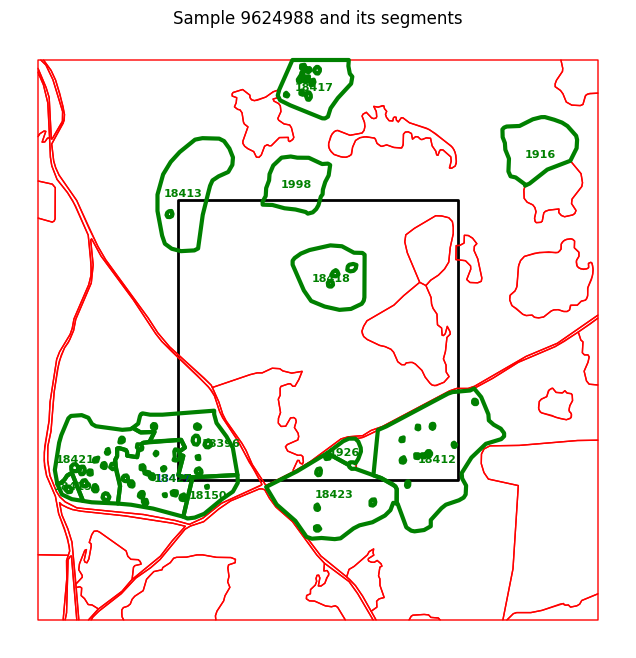

[18427, 18423, 18421, 18418, 18417, 18410, 18409, 18412, 18413, 18406, 18407, 18396, 18419, 1900, 2008, 1957, 1956, 1923, 1922, 1731, 2003, 2002, 2001, 2000, 1999, 1998, 2006, 2005, 2004, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1967, 1966, 1965, 1963, 1962, 1961, 1960, 1959, 1958, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1942, 1941, 1940, 1987, 1954, 1953, 1939, 1938, 1937, 1936, 1952, 1932, 1931, 1930, 1929, 1928, 1964, 1935, 1934, 1933, 1926, 1943, 1925, 1924, 1916, 1894, 1955, 1917, 1890, 1906, 1868, 1851, 2007, 18150]


In [46]:
#plot_id = gdf_sa["plotid"].iloc[1]
plot_id= 9624988
sam_plot = gdf_sa[gdf_sa["plotid"] == plot_id]
seg_plot = gdf_seg[gdf_seg["plotid"] == plot_id]


fig, ax = plt.subplots(figsize=(8, 8))

# plot main plot polygon
sam_plot.plot(
    ax=ax,
    facecolor="none",
    edgecolor="black",
    linewidth=2,
    label="Plot"
)

# plot segments inside
seg_plot.plot(
    ax=ax,
    facecolor="none",
    edgecolor="red",
    linewidth=1,
    label="Segments"
)

# add segment label
for _, row in seg_plot[seg_plot["gid"] == 18427].iterrows():
    x, y = row.geometry.representative_point().coords[0]
    ax.text(
        x, y,
        str(row["gid"]),
        fontsize=8,
        color="blue",
        ha="center",
        va="center"
    )

highlight_gid = [18427, 18423, 18421, 18418, 18417, 18412, 18413, 18396, 18419, 1998, 1926, 1916, 18150]

# Plot highlighted segment boundaries in green
seg_plot[seg_plot["gid"].isin(highlight_gid)].plot(
    ax=ax,
    facecolor="none",
    edgecolor="green",
    linewidth=3,
    label="Highlighted segments"
)

# Add gid labels for highlighted segments
for _, row in seg_plot[seg_plot["gid"].isin(highlight_gid)].iterrows():
    x, y = row.geometry.representative_point().coords[0]
    ax.text(
        x, y,
        str(row["gid"]),
        fontsize=8,
        color="green",
        ha="center",
        va="center",
        fontweight="bold"
    )



ax.set_title(f"Sample {plot_id} and its segments")
ax.set_axis_off()

plt.show()

gid_list = seg_plot["gid"].tolist()
print(gid_list)


### Inspecting the DataFrame Relations

The following code creates a **Pandas DataFrame** to display various summary statistics of the **`gdf_seg`** GeoDataFrame. Such as total rows, unique plotid, unique id, unique gid.


## Formula 1

### Calculating Crop Area for Each Segment

In this part of the analysis, we are calculating the crop area for each segment in the study. Here’s how we approach it:

1. **Merging Crop Data with Segment Information**:  
   We merge the **crop data** (`df_fieldwork`) with the **segment information** (`gdf_seg`) based on the **segment ID** (`gid`). This allows us to combine relevant data like the **segment area** (`areasize_w`) with the crop data.

2. **Calculating Crop Cover in Square Meters**:  
   For each segment, we calculate the crop area in square meters (`crop_cover_sqm`). This is done by multiplying the segment’s **area** with the **total crop cover percentage** and the **crop cover percentage** for that segment.  Only **visited segments** are included in this calculation. Since df_fieldwork contains exclusively segments that were visited during fieldwork, no additional visited indicator is required.

3. **Displaying Results**:  
   After performing these calculations, we display the first 5 rows of the resulting data to inspect the crop areas computed for each segment.

This process allows us to estimate the crop area for each segment in the dataset, considering both the segment’s size and the proportion of the segment covered by crops.

In [16]:
# cp = visited segment for a particular crop (df_fieldwork rows)
crop_area_seg = df_fieldwork.merge(
    gdf_seg[["gid", "areasize_w"]],
    on="gid",
    how="left"
)

crop_area_seg["crop_cover_sqm"] = (
    crop_area_seg["areasize_w"]
    * (crop_area_seg["total_crop_cover"] / 100)
    * (crop_area_seg["crop_cover_percentage"] / 100)
)

print(crop_area_seg.head())


    id  formid    plotid  enumerator_id    gid        report_close_time  \
0  820      20   9624988              1  18418  2025-04-10 12:06:32.653   
1  820      20   9624988              1  18418  2025-04-10 12:06:32.653   
2  821      20  12364565              2   9045  2025-04-10 12:06:45.057   
3  821      20  12364565              2   9058  2025-04-10 12:06:45.057   
4  821      20  12364565              2   9065  2025-04-10 12:06:45.057   

   total_crop_cover                          crop_po  crop_cover_percentage  \
0                80                          feijões                     30   
1                80                            milho                     50   
2               100                            trigo                    100   
3               100  batata doce de polpa alaranjada                    100   
4               100                          feijões                    100   

     areasize_w  crop_cover_sqm  
0  11374.813650     2729.955276  
1  113

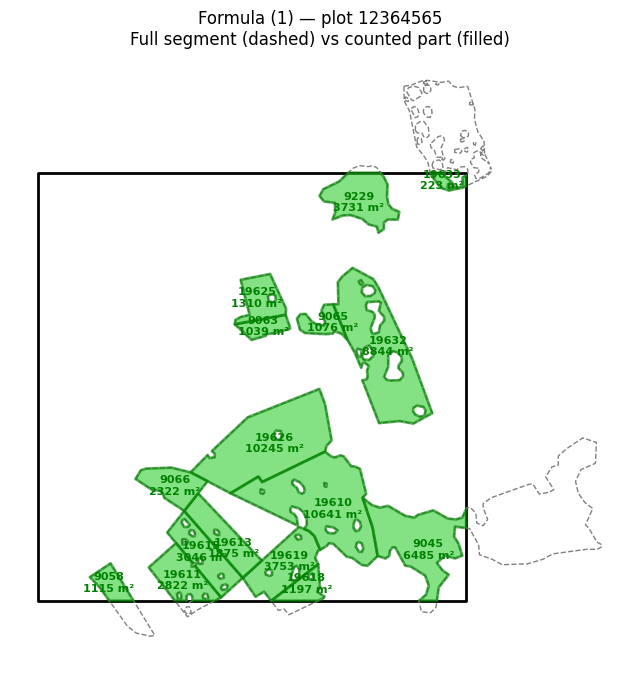

In [90]:


plot_id = 12364565

# --- Formula (1) segments for this SA + total area per gid
ca = crop_area_seg.loc[crop_area_seg["plotid"] == plot_id, ["gid", "crop_cover_sqm"]].copy()
A_gid = ca.groupby("gid", as_index=False)["crop_cover_sqm"].sum()
used_gids = A_gid["gid"].dropna().astype(int).tolist()

# --- SA geometry (and CRS fix if needed)
sa = gdf_sa.loc[gdf_sa["plotid"] == plot_id, ["geometry"]].copy()
if sa.crs is None:
    sa = sa.set_crs(gdf_seg.crs, allow_override=True)
if sa.crs != gdf_seg.crs:
    sa = sa.to_crs(gdf_seg.crs)
sa_geom = sa.geometry.iloc[0]

# --- full + clipped segment geometries
seg_full = gdf_seg.loc[gdf_seg["gid"].isin(used_gids), ["gid", "geometry"]].copy()
seg_clip = gpd.GeoDataFrame(
    seg_full.assign(geometry=seg_full.geometry.intersection(sa_geom)),
    geometry="geometry",
    crs=gdf_seg.crs
).merge(A_gid, on="gid", how="left")

# --- plot
fig, ax = plt.subplots(figsize=(8, 8))
sa.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)
seg_full.plot(ax=ax, facecolor="none", edgecolor="grey", linewidth=1, linestyle="--")
seg_clip.plot(ax=ax, facecolor="limegreen", edgecolor="green", linewidth=2, alpha=0.6)

for _, r in seg_clip.iterrows():
    x, y = r.geometry.representative_point().coords[0]
    ax.text(x, y, f"{int(r.gid)}\n{r.crop_cover_sqm:.0f} m²", fontsize=8,
            color="green", ha="center", va="center", fontweight="bold")

ax.set_title(f"Formula (1) — plot {plot_id}\nFull segment (dashed) vs counted part (filled)")
ax.set_axis_off()
plt.show()





## Formula 2

### Calculating Observed Crop Area for Each Sampling Area (SA)

In this step, we calculate the **observed crop area** for each **Sampling Area (SA)**, considering only the segments that have been visited. Here's how it's done:

1. **Grouping by Plot ID and Crop**:  
   We group the data by **`plotid`** and **`crop_po`** (which is the crop name in Portuguese). This ensures that we calculate the crop area for each plot and crop combination.

2. **Summing the Crop Area**:  
   For each group (plot and crop), we sum the **crop area in square meters** (`crop_cover_sqm`) to get the **total observed crop area** for each sampling area (SA). This gives us a value for how much of each crop is present in each plot, based on the visited segments.

3. **Renaming the Column**:  
   The resulting summed crop area is renamed as **`vis_crop_area`** to reflect that it is the observed crop area for each plot and crop combination.

4. **Displaying Results**:  
   Finally, we display the first 5 rows of the resulting DataFrame (`crop_area_sa`) to inspect the calculated observed crop areas.

This process gives us the total observed crop area for each plot and crop type based on the data from the visited segments.

In [17]:
#sa_cp = observed crop area of a particular crop for each SA using only the visited segments
crop_area_sa = (
    crop_area_seg.groupby(["plotid", "crop_po"])["crop_cover_sqm"]
      .sum()
      .reset_index(name="vis_crop_area")
)
print(crop_area_sa.head())

    plotid   crop_po  vis_crop_area
0  7644979   abóbora    2546.707067
1  7644979   feijões     608.909714
2  7644979    mapira    1620.692235
3  7644979  mexoeira    4470.740775
4  7644979     milho   54061.913867


In [18]:
# checking specific plot and crop
crop_area_sa_plot = crop_area_sa[
    (crop_area_sa["plotid"] == 9624988) &
    (crop_area_sa["crop_po"] == "feijões")
]

print(crop_area_sa_plot)


     plotid  crop_po  vis_crop_area
39  9624988  feijões    2729.955276


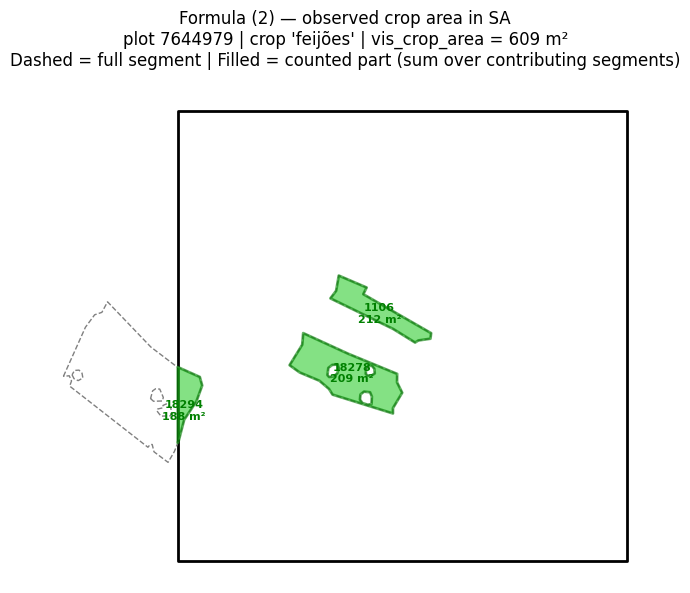

In [89]:
# ============================================================
# Formula (2): sa_cp = observed crop area per SA (visited only)
# ============================================================



plot_id = 7644979             # choose SA
crop_po = "feijões"         # choose crop (Portuguese name, as in df_fieldwork)

# --- Formula (2) table (your sa_cp)
crop_area_sa = (
    crop_area_seg.groupby(["plotid", "crop_po"])["crop_cover_sqm"]
      .sum()
      .reset_index(name="vis_crop_area")
)

# --- value for this plot + crop
row = crop_area_sa[(crop_area_sa["plotid"] == plot_id) & (crop_area_sa["crop_po"] == crop_po)]
if row.empty:
    raise ValueError(f"No Formula (2) value for plotid={plot_id}, crop_po='{crop_po}'")

vis_crop_area = float(row["vis_crop_area"].iloc[0])

# --- segments that contributed to Formula (2): (plotid, crop_po) rows in crop_area_seg
ca = crop_area_seg[(crop_area_seg["plotid"] == plot_id) & (crop_area_seg["crop_po"] == crop_po)].copy()
used_gids = ca["gid"].dropna().astype(int).unique().tolist()

# --- SA geometry (CRS-safe)
sa = gdf_sa.loc[gdf_sa["plotid"] == plot_id, ["geometry"]].copy()
if sa.crs is None:
    sa = sa.set_crs(gdf_seg.crs, allow_override=True)
if sa.crs != gdf_seg.crs:
    sa = sa.to_crs(gdf_seg.crs)
sa_geom = sa.geometry.iloc[0]

# --- full + clipped segment geometries for the contributing gids
seg_full = gdf_seg.loc[gdf_seg["gid"].isin(used_gids), ["gid", "geometry"]].copy()
seg_clip = gpd.GeoDataFrame(
    seg_full.assign(geometry=seg_full.geometry.intersection(sa_geom)),
    geometry="geometry",
    crs=gdf_seg.crs
)

# --- label per gid: Formula (1) crop area for THIS crop within this SA
A_gid = (
    ca.groupby("gid", as_index=False)["crop_cover_sqm"]
      .sum()
      .rename(columns={"crop_cover_sqm": "A_ij_sqm"})
)
seg_clip = seg_clip.merge(A_gid, on="gid", how="left")

# --- plot (same style)
fig, ax = plt.subplots(figsize=(8, 8))
sa.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)
seg_full.plot(ax=ax, facecolor="none", edgecolor="grey", linewidth=1, linestyle="--")
seg_clip.plot(ax=ax, facecolor="limegreen", edgecolor="green", linewidth=2, alpha=0.6)

for _, r in seg_clip.iterrows():
    x, y = r.geometry.representative_point().coords[0]
    ax.text(x, y, f"{int(r.gid)}\n{r.A_ij_sqm:.0f} m²", fontsize=8,
            color="green", ha="center", va="center", fontweight="bold")

ax.set_title(
    f"Formula (2) — observed crop area in SA\n"
    f"plot {plot_id} | crop '{crop_po}' | vis_crop_area = {vis_crop_area:.0f} m²\n"
    "Dashed = full segment | Filled = counted part (sum over contributing segments)"
)
ax.set_axis_off()
plt.show()


## Formula 3

### Calculating Cultivated Area for Each Sampling Area (SA) Using All Segments

This step calculates the **cultivated area** for each **Sampling Area (SA)** using all segments in the **`gdf_seg`** GeoDataFrame, regardless of whether they were visited. Here's how it's done:

1. **Filtering Cultivated Segments**:  
   We filter the **`gdf_seg`** GeoDataFrame to select only the segments classified as **cultivated** by checking the **`cuo_class_`** column, which indicates the land use type. This is stored in a new GeoDataFrame **`gdf_cult`**.

2. **Grouping by Plot ID**:  
   After filtering for cultivated segments, we group the data by **`plotid`** (the unique identifier for each plot). This allows us to calculate the total cultivated area for each plot.

3. **Summing the Cultivated Area**:  
   For each plot, we sum the **area size** (`areasize_w`) to get the total **cultivated area**. The summed area is renamed to **`cult_sa_sqm`** to represent the total cultivated area in square meters.

4. **Displaying Results**:  
   Finally, we display the first 8 rows of the resulting DataFrame (`cult_sa`) to inspect the calculated cultivated areas for each plot.

This process allows us to determine the total cultivated area for each plot, considering all the segments classified as cultivated.

In [19]:
# cultivated areas using all segments (gdf_seg)

gdf_cult = gdf_seg[gdf_seg["cuo_class_"] == "cultivated"]

cult_sa = (gdf_cult
    .groupby("plotid", as_index=False)["areasize_w"]
    .sum()
    .rename(columns={"areasize_w": "cult_sa_sqm"})
)

print(cult_sa.head(8))

    plotid    cult_sa_sqm
0  7015055   70613.434551
1  7155097  116802.647230
2  7644979  118460.836291
3  8104969     478.839229
4  8205137  156468.642569
5  8334712   16255.823615
6  8354714  167480.239045
7  8504703       0.000000


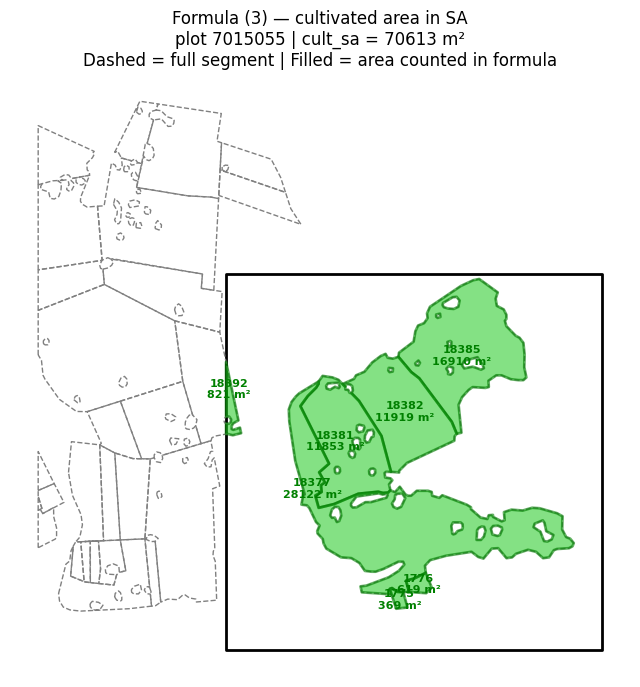

In [94]:
plot_id = 7015055

# ------------------------------------------
# Formula (3) value
# ------------------------------------------
cult_sa_val = (
    cult_sa.loc[cult_sa["plotid"] == plot_id, "cult_sa_sqm"]
    .iloc[0]
)

# ------------------------------------------
# cultivated segments in this SA
# ------------------------------------------
seg_cult = gdf_seg[
    (gdf_seg["plotid"] == plot_id) &
    (gdf_seg["cuo_class_"] == "cultivated")
][["gid", "geometry", "areasize_w"]].copy()

# ------------------------------------------
# SA geometry
# ------------------------------------------
sa = gdf_sa.loc[gdf_sa["plotid"] == plot_id, ["geometry"]].copy()
if sa.crs is None:
    sa = sa.set_crs(gdf_seg.crs, allow_override=True)
if sa.crs != gdf_seg.crs:
    sa = sa.to_crs(gdf_seg.crs)
sa_geom = sa.geometry.iloc[0]

# ------------------------------------------
# clipped cultivated geometries
# ------------------------------------------
seg_clip = gpd.GeoDataFrame(
    seg_cult.assign(geometry=seg_cult.geometry.intersection(sa_geom)),
    geometry="geometry",
    crs=gdf_seg.crs
)

# ------------------------------------------
# plot
# ------------------------------------------
fig, ax = plt.subplots(figsize=(8, 8))

# SA boundary
sa.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)

# full cultivated segment boundaries
seg_cult.plot(
    ax=ax,
    facecolor="none",
    edgecolor="grey",
    linewidth=1,
    linestyle="--"
)

# cultivated area used in Formula (3)
seg_clip.plot(
    ax=ax,
    facecolor="limegreen",
    edgecolor="green",
    linewidth=2,
    alpha=0.6
)

# labels
for _, r in seg_clip.iterrows():
    if r.geometry.is_empty:
        continue
    x, y = r.geometry.representative_point().coords[0]
    ax.text(
        x, y,
        f"{int(r.gid)}\n{r.areasize_w:.0f} m²",
        fontsize=8,
        color="green",
        ha="center",
        va="center",
        fontweight="bold"
    )

ax.set_title(
    f"Formula (3) — cultivated area in SA\n"
    f"plot {plot_id} | cult_sa = {cult_sa_val:.0f} m²\n"
    "Dashed = full segment | Filled = area counted in formula"
)
ax.set_axis_off()
plt.show()


Cultivated segments intersecting SA: 7
Clipped pieces plotted: 7


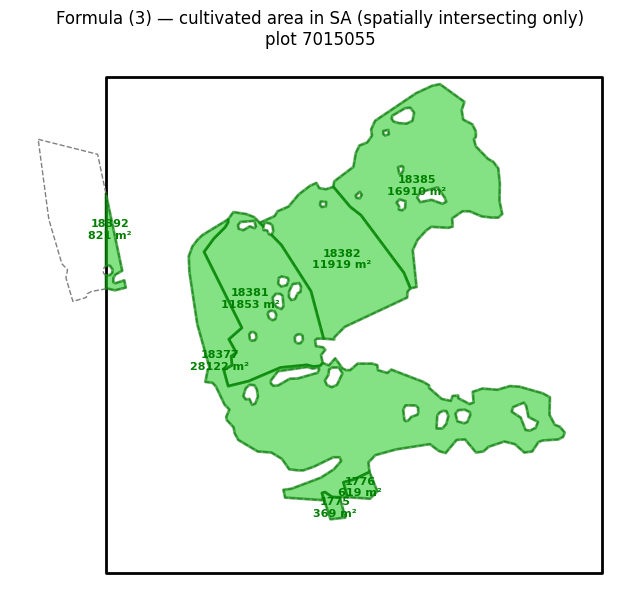

In [98]:
import matplotlib.pyplot as plt
import geopandas as gpd

plot_id = 7015055

# --- SA geometry (CRS-safe)
sa = gdf_sa.loc[gdf_sa["plotid"] == plot_id, ["geometry"]].copy()
if sa.empty:
    raise ValueError(f"plotid {plot_id} not found in gdf_sa")

if sa.crs is None:
    sa = sa.set_crs(gdf_seg.crs, allow_override=True)
if sa.crs != gdf_seg.crs:
    sa = sa.to_crs(gdf_seg.crs)

sa_geom = sa.geometry.iloc[0]

# --- cultivated segments that truly intersect this SA (spatial truth)
seg_cult = gdf_seg.loc[gdf_seg["cuo_class_"] == "cultivated", ["gid", "geometry", "areasize_w"]].copy()
seg_cult = seg_cult[seg_cult.geometry.intersects(sa_geom)].copy()

# --- clipped part inside SA (what Formula 3 counts)
seg_clip = gpd.GeoDataFrame(
    seg_cult.assign(geometry=seg_cult.geometry.intersection(sa_geom)),
    geometry="geometry",
    crs=gdf_seg.crs
)
seg_clip = seg_clip[~seg_clip.geometry.is_empty].copy()

print("Cultivated segments intersecting SA:", seg_cult["gid"].nunique())
print("Clipped pieces plotted:", len(seg_clip))

# --- plot
fig, ax = plt.subplots(figsize=(8, 8))

sa.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)

# dashed = full boundaries (but ONLY those that intersect)
seg_cult.plot(ax=ax, facecolor="none", edgecolor="grey", linewidth=1, linestyle="--")

# filled = intersection part (counted area)
seg_clip.plot(ax=ax, facecolor="limegreen", edgecolor="green", linewidth=2, alpha=0.6)

# label with within-SA cultivated area (use areasize_w as your α(si))
for _, r in seg_clip.iterrows():
    x, y = r.geometry.representative_point().coords[0]
    ax.text(x, y, f"{int(r.gid)}\n{r.areasize_w:.0f} m²",
            fontsize=8, color="green", ha="center", va="center", fontweight="bold")

ax.set_title(f"Formula (3) — cultivated area in SA (spatially intersecting only)\nplot {plot_id}")
ax.set_axis_off()
plt.show()


## Formula 4

### Calculating Full Crop Area for Each Plot

This step calculates the **full crop area** for each plot, considering both the **observed crop area** and the **cultivated area**. Here's how it's done:

1. **Merging DataFrames**:  
   We merge three datasets into one:
   - **`crop_area_sa`**: Contains the observed crop area for each plot and crop.
   - **`cult_sa`**: Contains the total cultivated area for each plot.
   - **`sa_visited_seg`**: Contains the area of the segments that were visited in each plot.
   
   The merge operation is done on the **`plotid`** column, and we use a **left join** to keep all the rows from `crop_area_sa`.

2. **Calculating Full Crop Area**:  
   Once the data is merged, we calculate the **full crop area** (`full_crop_sqm`) for each plot using the formula. The formula multiplies the observed crop area by the total cultivated area and divides by the area of the visited segments. The result gives us the full crop area for each plot.

3. **Displaying the Resulting Data**:  
   The resulting **`full_crop_area`** GeoDataFrame now contains the calculated full crop areas, ready for further analysis or visualization.

This process provides a more comprehensive estimate of the crop area, taking into account both the observed data and the total cultivated area for each plot.

In [20]:

# Step 1: unique visited segment gids per plotid from df_fieldwork
visited_gids = df_fieldwork[["plotid", "gid"]].drop_duplicates()

# Step 2: attach segment areas from gdf_seg
visited_gids = visited_gids.merge(
    gdf_seg[["gid", "areasize_w"]],
    on="gid",
    how="left"
)

# Step 3: sum visited segment area per sampling area
sa_visited_seg = (
    visited_gids
    .groupby("plotid", as_index=False)["areasize_w"]
    .sum()
    .rename(columns={"areasize_w": "sa_visited_sqm"})
)


In [21]:

full_crop_area = (
    crop_area_sa.merge(cult_sa, on="plotid", how="left")
         .merge(sa_visited_seg, on="plotid", how="left")
)

full_crop_area["full_crop_sqm"]= (
    full_crop_area["vis_crop_area"]
    * full_crop_area["cult_sa_sqm"]
    / full_crop_area["sa_visited_sqm"]
)
full_crop_area

,plotid,crop_po,vis_crop_area,cult_sa_sqm,sa_visited_sqm,full_crop_sqm
0,7644979,abóbora,2546.707067,118460.836291,115791.589698,2605.414173
1,7644979,feijões,608.909714,118460.836291,115791.589698,622.946400
2,7644979,mapira,1620.692235,118460.836291,115791.589698,1658.052696
3,7644979,mexoeira,4470.740775,118460.836291,115791.589698,4573.801020
4,7644979,milho,54061.913867,118460.836291,115791.589698,55308.157914
...,...,...,...,...,...,...
196,12364565,batata doce de polpa alaranjada,1115.380969,73617.084895,61640.756505,1332.090976
197,12364565,feijões,1862.903969,73617.084895,61640.756505,2224.851988
198,12364565,mexoeira,3730.725984,73617.084895,61640.756505,4455.577560
199,12364565,milho,3632.925278,73617.084895,61640.756505,4338.774924


### Formula 5

### Calculating Stratum-Level Crop Area

In this step, we calculate the total crop area for each **stratum** and **crop** by first adding the **profile** (which represents the stratum) to the `full_crop_area` DataFrame, and then aggregating the crop area for each stratum-crop combination.

1. **Adding the Profile Information**:  
   The profile (stratum) is added to the `full_crop_area` DataFrame by merging the **`gdf_seg`** GeoDataFrame, where the profile is associated with each plot ID.

2. **Aggregating the Crop Area by Stratum**:  
   The crop area for each stratum and crop is summed to calculate the **total crop area** at the stratum level.


In [22]:
##helper for F5
# ---------- add profile once (needed for F5/F6) ----------this is just adding "profile"
plotid_to_profile = (
    gdf_seg.groupby("plotid", as_index=False)["profile"].first()
)
full_crop_area = full_crop_area.merge(plotid_to_profile, on="plotid", how="left")

In [23]:
## here again A_sj1 because
stratum_crop_area = (
    full_crop_area
    .rename(columns={"profile": "stratum"})
    .groupby(["stratum", "crop_po"], as_index=False)["full_crop_sqm"]
    .sum()
    .rename(columns={"full_crop_sqm": "stratum_crop_sqm"})
)

stratum_crop_area



,stratum,crop_po,stratum_crop_sqm
0,10 early pedi,abóbora,242.399663
1,10 early pedi,amendoim pequeno,1990.525589
2,10 early pedi,batata doce de polpa alaranjada,42.618289
3,10 early pedi,batata doce de polpa nāo alaranjada,3368.962608
4,10 early pedi,cana de açucar,145.491569
...,...,...,...
121,scarce alluvial,batata doce de polpa alaranjada,1311.737231
122,scarce alluvial,batata doce de polpa nāo alaranjada,4629.610379
123,scarce alluvial,feijões,30813.107968
124,scarce alluvial,mandioca,38451.838039


## Formula 6

### Calculating Stratum Area Based on Sampling Areas

The following steps explain the process of calculating the total area for each **stratum** in Gaza province, using the number of unique plots in each stratum and the area of each sampling area:

- **PLOT_AREA**: Defines the area of each sampling area in Gaza as **500m x 500m** (250,000 square meters).
  
- **Filtering**: We filter the **GeoDataFrame** (`gdf_sa`) to include only rows where the **province** is **Gaza** and where the **`optional`** field indicates that the segment has been visited or scheduled for a visit.

- **Grouping and Counting**: We group the data by **stratum** and calculate the number of **unique plot IDs** within each stratum. This represents how many distinct plots exist within each stratum.

- **Calculating Area**: The total area for each stratum is calculated by multiplying the number of unique plots by the sampling area size (250,000 square meters per plot).

- **Displaying Results**: Finally, the first 5 rows of the resulting **stratum area** are displayed to give an overview of the calculated areas for each stratum.

This process helps to estimate the total area for each agricultural stratum based on the number of plots in Gaza.

so here i have two different approaches with complete different results

In [24]:
PLOT_AREA = 500 * 500  # all sampling areas in gaza are 500 x 500m

stratum_sa_area = (
    gdf_sa[
        (gdf_sa["prov"] == "Gaza") &
        (gdf_sa["optional"].isin([0, 2]))
    ]
    .groupby("stratum", as_index=False)["plotid"]
    .nunique()
    .assign(stratum_sa_sqm=lambda x: x["plotid"] * PLOT_AREA)
    .drop(columns="plotid")
)

print(stratum_sa_area.head())



         stratum  stratum_sa_sqm
0  10 early pedi         1000000
1   11 late pedi          750000
2       12 flood          750000
3   12 late pedi          750000
4       17 flood          750000


## Formula 7

### Calculating Stratum Crop Percentage

In the final step, we calculate the **crop percentage** for each **stratum**, which helps us understand the proportion of each stratum that is covered by crops. Here’s how it’s done:

1. **Merging Stratum Crop Area with Total Stratum Area**:  
   We merge the **`stratum_crop_area`** DataFrame, which contains the total crop area for each stratum and crop, with the **`stratum_sa_area`** DataFrame, which contains the total area for each stratum. The merge is performed using the **`stratum`** column.

2. **Calculating Stratum Crop Percentage**:  
   The **stratum crop percentage** (`scp_value`) is calculated by dividing the **crop area** (`stratum_crop_sqm`) by the **total stratum area** (`stratum_sa_sqm`) and then multiplying by 100 to get the percentage.

3. **Displaying Results**:  
   Finally, we display the first 5 rows of the **`stratum_crop_perc`** DataFrame to inspect the calculated crop percentages for each stratum.

This process helps to quantify the proportion of each stratum that is covered by crops, which is useful for understanding land use in Gaza.

In [26]:


# Merge stratum crop area with total stratum area
stratum_crop_perc = (
    stratum_crop_area
    .merge(stratum_sa_area, on="stratum", how="left")
)

# Calculate stratum crop percentage
stratum_crop_perc["scp_value"] = stratum_crop_perc["stratum_crop_sqm"] / stratum_crop_perc["stratum_sa_sqm"] *100

print(stratum_crop_perc.head())



         stratum                              crop_po  stratum_crop_sqm  \
0  10 early pedi                              abóbora        242.399663   
1  10 early pedi                     amendoim pequeno       1990.525589   
2  10 early pedi      batata doce de polpa alaranjada         42.618289   
3  10 early pedi  batata doce de polpa nāo alaranjada       3368.962608   
4  10 early pedi                       cana de açucar        145.491569   

   stratum_sa_sqm  scp_value  
0         1000000   0.024240  
1         1000000   0.199053  
2         1000000   0.004262  
3         1000000   0.336896  
4         1000000   0.014549  


In [28]:
# Merge English crop names into stratum_crop_perc (scp)
scp_table = (
    stratum_crop_perc
    .merge(df_crop_list[["crop_po", "crop_en"]], on="crop_po", how="left")
)

print(scp_table.head())


         stratum                              crop_po  stratum_crop_sqm  \
0  10 early pedi                              abóbora        242.399663   
1  10 early pedi                     amendoim pequeno       1990.525589   
2  10 early pedi      batata doce de polpa alaranjada         42.618289   
3  10 early pedi  batata doce de polpa nāo alaranjada       3368.962608   
4  10 early pedi                       cana de açucar        145.491569   

   stratum_sa_sqm  scp_value                          crop_en  
0         1000000   0.024240                           squash  
1         1000000   0.199053                     small peanut  
2         1000000   0.004262      orange-fleshed sweet potato  
3         1000000   0.336896  non-orange-fleshed sweet potato  
4         1000000   0.014549                        sugarcane  


In [30]:
scp_pivot = (
    scp_table
    .pivot_table(
        index="stratum",
        columns="crop_en",
        values="scp_value",
        aggfunc="mean",   # safe even if one value per cell or sum/first
        fill_value=0
    )
)
scp_pivot = scp_pivot.reset_index()
scp_pivot.head()


crop_en,stratum,beans,cassava,corn,large peanut,lettuce,macadamia nuts,millet,non-orange-fleshed sweet potato,okra,orange-fleshed sweet potato,other vegetable,piri-piri,rice,small peanut,sorghum,squash,sugarcane,wheat
0,10 early pedi,3.603130,2.989630,1.518633,0.000000,0.0,0.0,0.0,0.336896,0.0,0.004262,0.007606,0.0,0.0,0.199053,0.0,0.024240,0.014549,0.0
1,11 late pedi,5.522835,7.322433,7.252966,0.752721,0.0,0.0,0.0,0.135563,0.0,0.133177,1.626833,0.0,0.0,0.033829,0.0,0.000000,0.000000,0.0
2,12 flood,2.954371,4.244803,18.150174,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.081767,0.000000,0.0
3,12 late pedi,3.203864,2.658242,1.412663,0.000000,0.0,0.0,0.0,0.030250,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,17 flood,1.208079,0.725309,7.561745,0.396997,0.0,0.0,0.0,0.000000,0.0,0.000000,0.052183,0.0,0.0,0.771387,0.0,0.019320,0.000000,0.0


In [31]:
print(scp_pivot.columns)


Index(['stratum', 'beans', 'cassava', 'corn', 'large peanut', 'lettuce',
       'macadamia nuts', 'millet', 'non-orange-fleshed sweet potato', 'okra',
       'orange-fleshed sweet potato', 'other vegetable', 'piri-piri', 'rice',
       'small peanut', 'sorghum', 'squash', 'sugarcane', 'wheat'],
      dtype='object', name='crop_en')


In [32]:
print(scp_pivot.index)


RangeIndex(start=0, stop=22, step=1)


In [33]:
scp_pivot["stratum"].nunique()


22

In [34]:
#scp_pivot.to_csv("scp_stratum_crop_table.csv")

#$from google.colab import files

#files.download("scp_stratum_crop_table.csv")


## Comparison

In [35]:
df_osr = pd.read_csv("../content/drive/MyDrive/Data_Mastery/data/original_study_results.csv")
df_osr.head()

,stratum,crop,beans,cabbage,cassava,cotton,eggplant,garlic,ginger,kidney potato,...,sesame,small peanut,sorghum,soybean,squash,sugarcane,sunflower,tomato,wheat,yam/amadumbe
0,Gaza irrigated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,irrigated alluvial,"0,111",,,,,,,,,...,,"0,295",,"0,404",,,,,NaN,NaN
2,Gaza low-intensity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,alluvial,"1,991",,"2,6",,,,,,,...,"0,101",,,,,,,,NaN,NaN
4,coastal pedi,,,,,,,,,,...,,,,,,,,,NaN,NaN


In [36]:
df_osr.columns = df_osr.columns.str.strip()

In [37]:
def clean_stratum(x):
    if pd.isna(x):
        return None
    s = str(x).replace("\xa0", " ")
    s = " ".join(s.split())     # collapse multiple spaces
    return s.strip().lower()    # trim + lowercase

s1 = set(scp_pivot["stratum"].dropna().map(clean_stratum))
s2 = set(df_osr["stratum"].dropna().map(clean_stratum))

shared_strata = sorted(s1 & s2)
print("Count:", len(shared_strata))
print(shared_strata[:50])


Count: 21
['10 early pedi', '11 late pedi', '12 flood', '12 late pedi', '17 flood', '23 flood', '24-33 flood', '32 flood', '4 early inland pedi', '5 early alluvial', '5 late pedi', '6 early alluvial', '6 early coastal pedi', '6 early inland pedi', '7 early pedi', '7 late alluvial', '8 early alluvial', '8 late pedi', '9 early alluvial', '9 flood', 'irrigated alluvial']


In [38]:
print("scp unique:", scp_pivot["stratum"].nunique())
print("osr unique:", df_osr["stratum"].nunique())
print("shared:", len(shared_strata))


scp unique: 22
osr unique: 28
shared: 21


In [39]:
missing_from_osr = sorted(s1 - s2)

print("Stratum in SCP but not in OSR:")
print(missing_from_osr)


Stratum in SCP but not in OSR:
['scarce alluvial']


In [40]:
alluvial_scp = sorted([s for s in s1 if "alluvial" in s])
alluvial_osr = sorted([s for s in s2 if "alluvial" in s])

print("Alluvial in SCP:")
print(alluvial_scp)
print("Count:", len(alluvial_scp))

print("\nAlluvial in OSR:")
print(alluvial_osr)
print("Count:", len(alluvial_osr))


Alluvial in SCP:
['5 early alluvial', '6 early alluvial', '7 late alluvial', '8 early alluvial', '9 early alluvial', 'irrigated alluvial', 'scarce alluvial']
Count: 7

Alluvial in OSR:
['5 early alluvial', '6 early alluvial', '7 late alluvial', '8 early alluvial', '9 early alluvial', 'alluvial', 'irrigated alluvial']
Count: 7


While both datasets include seven alluvial strata, the OSR table reports a single aggregated category (“alluvial”), whereas the reproduced SCP results distinguish an additional sub-category (“scarce alluvial”). For comparison purposes, this stratum was harmonised with the general alluvial class.

In [41]:
scp_pivot["stratum"] = scp_pivot["stratum"].replace({
    "scarce alluvial": "alluvial"
})
alluvial_scp = sorted([s for s in s1 if "alluvial" in s])
print("Alluvial in SCP:")
print(alluvial_scp)
print("Count:", len(alluvial_scp))

Alluvial in SCP:
['5 early alluvial', '6 early alluvial', '7 late alluvial', '8 early alluvial', '9 early alluvial', 'irrigated alluvial', 'scarce alluvial']
Count: 7


In [42]:
def clean_stratum(x):
    if pd.isna(x):
        return None
    s = str(x).replace("\xa0", " ")
    s = " ".join(s.split())     # collapse multiple spaces
    return s.strip().lower()    # trim + lowercase

s1 = set(scp_pivot["stratum"].dropna().map(clean_stratum))
s2 = set(df_osr["stratum"].dropna().map(clean_stratum))

shared_strata = sorted(s1 & s2)
print("Count:", len(shared_strata))
print(shared_strata[:50])


Count: 22
['10 early pedi', '11 late pedi', '12 flood', '12 late pedi', '17 flood', '23 flood', '24-33 flood', '32 flood', '4 early inland pedi', '5 early alluvial', '5 late pedi', '6 early alluvial', '6 early coastal pedi', '6 early inland pedi', '7 early pedi', '7 late alluvial', '8 early alluvial', '8 late pedi', '9 early alluvial', '9 flood', 'alluvial', 'irrigated alluvial']
